In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [3]:
# Variables to map columns
# New values are assigned as "in-between" values to ease plotting and calculations
index_options = {
    '0x': 0,
    '1-5x': 3,
    '6-10x': 8,
    '11-20x': 15,
    '21-50x': 35,
    '> 50x': 60
}

omo_options = {
    'Not at all': 0,
    '1 to 5 times': 3,
    '6 to 10 times': 8,
    '11 to 20 times': 15,
    '21 to 50 times': 35,
    'More than 50 times': 60
}

satisfaction_options = {
    '0 - Not at all satisfied': 3,
    '1': 3,
    '2': 3,
    '3': 3,
    '4': 6,
    '5': 6,
    '6': 6,
    '7': 6,
    '8': 10,
    '9': 10,
    '10 - Completely satisfied': 10
}

duration_options = {
    '0-2': 1,
    '3-5': 4,
    '6-10': 8,
    '11-20': 15,
    '21+': 25,
}

rename_columns = {
    'omo15i1_w2b': 'Anchor kiss (E)',
    'omo15i2_w2b': 'Anchor kiss (D)',
    'pomo15i1_w2b': 'Partner kiss (E)',
    'pomo15i2_w2b': 'Partner kiss (D)',
    'omo16i1_w2b': 'Anchor hold (E)',
    'omo16i2_w2b': 'Anchor hold (D)',
    'pomo16i1_w2b': 'Partner hold (E)',
    'pomo16i2_w2b': 'Partner hold (D)',
    'omo17i1_w2b': 'Anchor intimacy (E)',
    'omo17i2_w2b': 'Anchor intimacy (D)',
    'pomo17i1_w2b': 'Partner intimacy (E)',
    'pomo17i2_w2b': 'Partner intimacy (D)',
    'relsat': 'Anchor relationship satisfaction',
    'relint': 'Anchor communication quality',
    'lifsat': 'Anchor life satisfaction',
    'prelsat': 'Partner relationship satisfaction',
    'prelint': 'Partner communication quality',
    'plifsat': 'Partner life satisfaction',
    'agediff_class': 'Age difference',
    'nkidsliv_class': 'Kids'
}

"The three scales "Intimacy" [Intimität], "Apreciation" [Wertschätzung], and "Conflict" [Konflikt] were adapted from the "Network of Relationships Inventory (NRI)" (Furman & Buhrmester, 1985) and used in an abbreviated form and adapted by pairfam and Freda (Hank et al. 2024)."

(more detailed: In contrast to the original version of the NRI, the questions in this version were asked only concerning the relationship with the partner, and not to any other persons with whom the respondent has a relationship. Furthermore, to limit the volume of data collected, the individual scales have been shortened from three to two items each. The response format has five stages, as did the original, but in this version they reflect frequency (1=Never to 5=Very frequently).)

In [4]:
# Rename some columns to ease understanding
df = df.rename(
    columns=rename_columns
)

# Create columns for speed
df['age-group(Anchor)'] = None
df['age-group(Partner)'] = None

# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor relationship satisfaction'] = df['Anchor relationship satisfaction'].map(satisfaction_options)
df['Partner relationship satisfaction'] = df['Partner relationship satisfaction'].map(satisfaction_options)
df['Anchor life satisfaction'] = df['Anchor life satisfaction'].map(satisfaction_options)
df['Partner life satisfaction'] = df['Partner life satisfaction'].map(satisfaction_options)

df['Anchor kiss (E)'] = df['Anchor kiss (E)'].map(omo_options)
df['Anchor hold (E)'] = df['Anchor hold (E)'].map(omo_options)
df['Anchor intimacy (E)'] = df['Anchor intimacy (E)'].map(omo_options)
df['Anchor kiss (D)'] = df['Anchor kiss (D)'].map(omo_options)
df['Anchor hold (D)'] = df['Anchor hold (D)'].map(omo_options)
df['Anchor intimacy (D)'] = df['Anchor intimacy (D)'].map(omo_options)

df['Partner kiss (E)'] = df['Partner kiss (E)'].map(omo_options)
df['Partner hold (E)'] = df['Partner hold (E)'].map(omo_options)
df['Partner intimacy (E)'] = df['Partner intimacy (E)'].map(omo_options)
df['Partner kiss (D)'] = df['Partner kiss (D)'].map(omo_options)
df['Partner hold (D)'] = df['Partner hold (D)'].map(omo_options)
df['Partner intimacy (D)'] = df['Partner intimacy (D)'].map(omo_options)

df['Relationship length'] = df['reldur_class'].map(duration_options)


In [14]:
# Group anchor and partner by age
for i in range(0, len(df)):
    if df['age'][i] <= 20:
        df.loc[i, 'age-group(Anchor)'] = '<21'
    elif 20 < df['age'][i] <= 30:
        df.loc[i, 'age-group(Anchor)'] = '21-30'
    elif 30 < df['age'][i] <= 40:
        df.loc[i, 'age-group(Anchor)'] = '31-40'
    elif 40 < df['age'][i] <= 50:
        df.loc[i, 'age-group(Anchor)'] = '41-50'
    elif 50 < df['age'][i]:
        df.loc[i, 'age-group(Anchor)'] = '>50'

for i in range(0, len(df)):
    if df['page'][i] <= 20:
        df.loc[i, 'age-group(Partner)'] = '<21'
    elif 20 < df['age'][i] <= 30:
        df.loc[i, 'age-group(Partner)'] = '21-30'
    elif 30 < df['age'][i] <= 40:
        df.loc[i, 'age-group(Partner)'] = '31-40'
    elif 40 < df['age'][i] <= 50:
        df.loc[i, 'age-group(Partner)'] = '41-50'
    elif 50 < df['age'][i]:
        df.loc[i, 'age-group(Partner)'] = '>50'

<Axes: xlabel='age-group(Anchor)', ylabel='Value'>

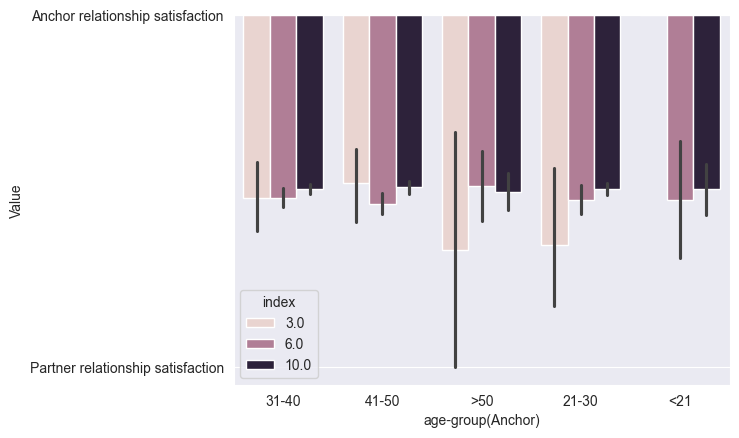

In [17]:
tidy = df.melt(id_vars='age-group(Anchor)',
               value_vars=['Anchor relationship satisfaction', 'Partner relationship satisfaction'],
               var_name='Value', value_name='index')
sns.barplot(x='age-group(Anchor)', y='Value', hue='index', data=tidy)

Compare Anchor and Partner. 
Find if there is any discrepancy between the reported frequency (kiss, pat, hug)
1. Anchor reported - Anchor desire
2. Partner reported - Partner desire

In [62]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor experienced_index'] = np.mean(
        [df['Anchor kiss (E)'][i], df['Anchor hold (E)'][i], df['Anchor intimacy (E)'][i]])
    df.loc[i, 'Partner experienced_index'] = np.mean(
        [df['Partner kiss (E)'][i], df['Partner hold (E)'][i], df['Partner intimacy (E)'][i]])

    df.loc[i, 'Anchor desired_index'] = np.mean(
        [df['Anchor kiss (D)'][i], df['Anchor hold (D)'][i], df['Anchor intimacy (D)'][i]])
    df.loc[i, 'Partner desired_index'] = np.mean(
        [df['Partner kiss (D)'][i], df['Partner hold (D)'][i], df['Partner intimacy (D)'][i]])

    df.loc[i, 'Anchor kiss_discrepancy'] = abs(df['Anchor kiss (E)'][i] - df['Anchor kiss (D)'][i])
    df.loc[i, 'Anchor hold_discrepancy'] = abs(df['Anchor hold (E)'][i] - df['Anchor hold (D)'][i])
    df.loc[i, 'Anchor hug_discrepancy'] = abs(df['Anchor intimacy (E)'][i] - df['Anchor intimacy (D)'][i])

    df.loc[i, 'Partner kiss_discrepancy'] = abs(df['Partner kiss (E)'][i] - df['Partner kiss (D)'][i])
    df.loc[i, 'Partner hold_discrepancy'] = abs(df['Partner hold (E)'][i] - df['Partner hold (D)'][i])
    df.loc[i, 'Partner hug_discrepancy'] = abs(df['Partner intimacy (E)'][i] - df['Partner intimacy (D)'][i])

In [63]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor overall discrepancy'] = np.mean(
        [df['Anchor kiss_discrepancy'][i], df['Anchor hold_discrepancy'][i], df['Anchor hug_discrepancy'][i]])
    df.loc[i, 'Partner overall discrepancy'] = np.mean(
        [df['Partner kiss_discrepancy'][i], df['Partner hold_discrepancy'][i], df['Partner hug_discrepancy'][i]])

Start with some descriptive statistics, including a Correlation Matrix

In [64]:
# delete those with no relationship duration data
df = df[df['reldur_class'] != '.']

<Axes: xlabel='Relationship length', ylabel='index'>

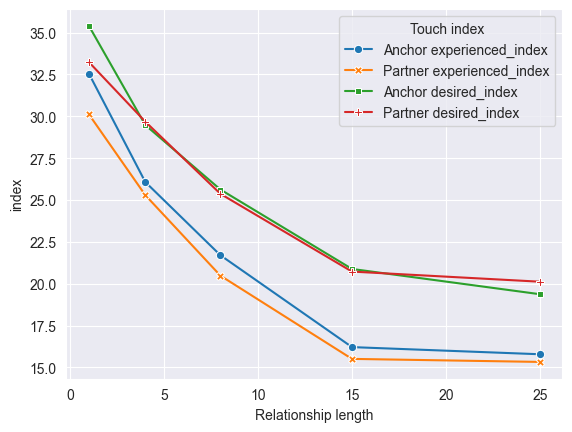

In [66]:
# Calculate means for touch variables
anchor_touch_experienced = df.groupby('Relationship length')['Anchor experienced_index'].mean().reset_index()
anchor_touch_desired = df.groupby('Relationship length')['Partner experienced_index'].mean().reset_index()

partner_touch_experienced = df.groupby('Relationship length')['Anchor desired_index'].mean().reset_index()
partner_touch_desired = df.groupby('Relationship length')['Partner desired_index'].mean().reset_index()

dfs = [anchor_touch_experienced, anchor_touch_desired, partner_touch_experienced, partner_touch_desired]

touch_indexes = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
                                                    how='outer'), dfs)

touch_indexes = touch_indexes.melt(id_vars='Relationship length',
                                   value_vars=['Anchor experienced_index', 'Partner experienced_index',
                                               'Anchor desired_index', 'Partner desired_index'],
                                   var_name='Touch index', value_name='index'
                                   )

sns.lineplot(data=touch_indexes,
             x='Relationship length',
             y='index',
             hue='Touch index',
             style='Touch index',
             markers=True, dashes=False
             )

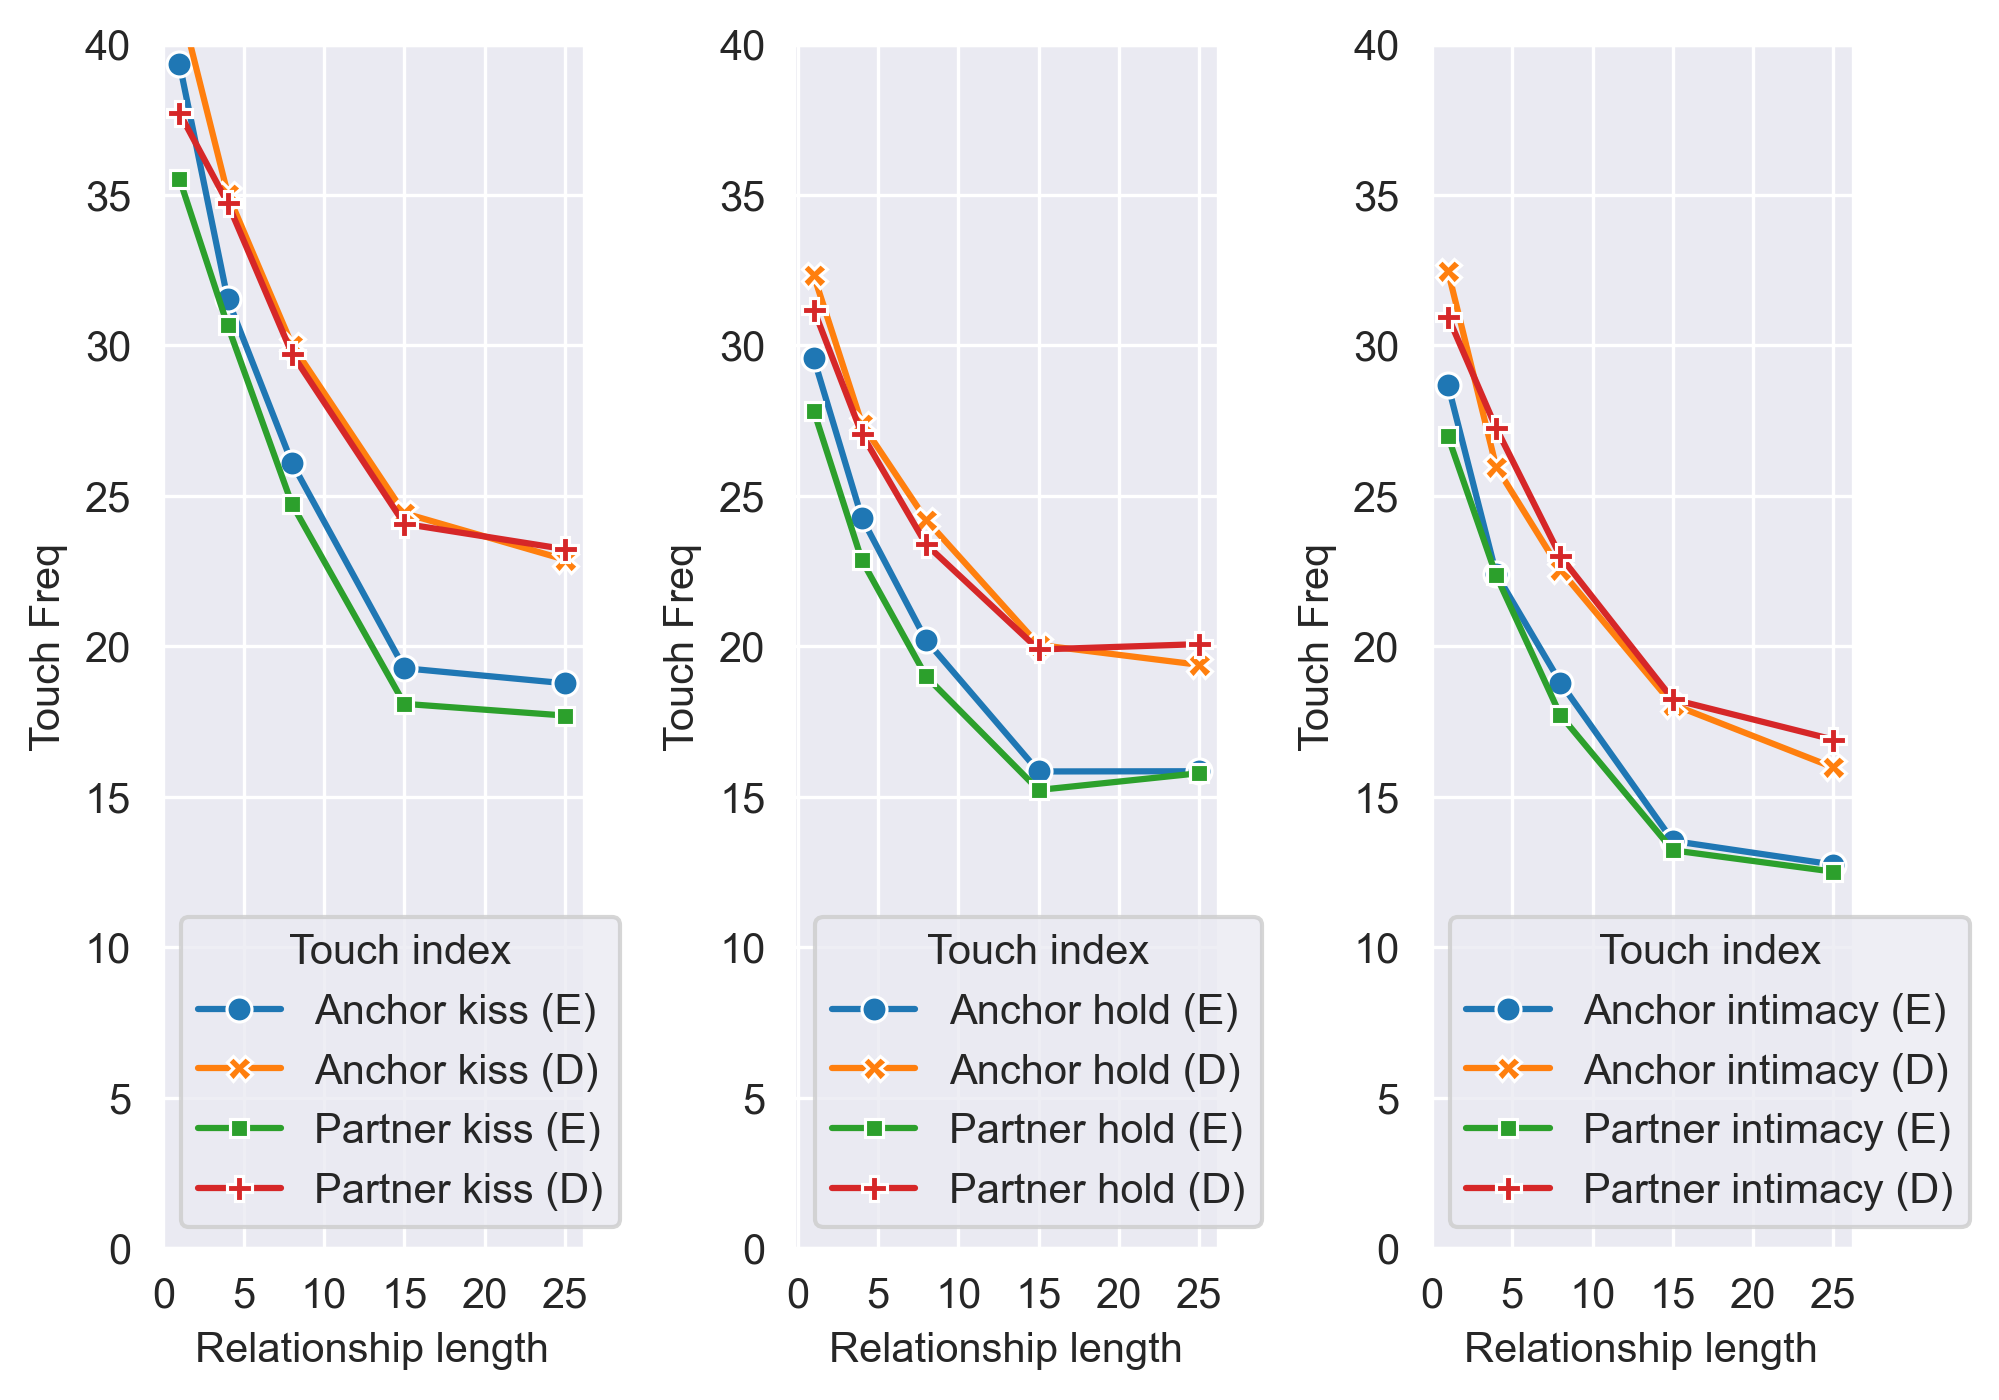

In [80]:
# Calculate means for touch variables
df_touch = df[[
    'age', 'page', 'Relationship length', 'Anchor kiss (E)',
    'Anchor hold (E)', 'Anchor intimacy (E)', 'Anchor kiss (D)', 'Anchor hold (D)',
    'Anchor intimacy (D)', 'Partner kiss (E)', 'Partner hold (E)', 'Partner intimacy (E)',
    'Partner kiss (D)', 'Partner hold (D)', 'Partner intimacy (D)'
]]

df_touch = df_touch.groupby('Relationship length').mean().reset_index()

kissing = df_touch.melt(id_vars='Relationship length',
                        value_vars=['Anchor kiss (E)', 'Anchor kiss (D)', 'Partner kiss (E)', 'Partner kiss (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )
holding = df_touch.melt(id_vars='Relationship length',
                        value_vars=['Anchor hold (E)', 'Anchor hold (D)', 'Partner hold (E)', 'Partner hold (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )
hugging = df_touch.melt(id_vars='Relationship length',
                        value_vars=['Anchor intimacy (E)', 'Anchor intimacy (D)', 'Partner intimacy (E)',
                                    'Partner intimacy (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )

fig, ax = plt.subplots(1, 3)

sns.lineplot(
    data=kissing,
    x='Relationship length',
    y='Touch Freq',
    hue='Touch index',
    style='Touch index',
    markers=True, dashes=False,
    ax=ax[0]
)

sns.lineplot(
    data=holding,
    x='Relationship length',
    y='Touch Freq',
    hue='Touch index',
    style='Touch index',
    markers=True, dashes=False,
    ax=ax[1]
)

sns.lineplot(
    data=hugging,
    x='Relationship length',
    y='Touch Freq',
    hue='Touch index',
    style='Touch index',
    markers=True, dashes=False,
    ax=ax[2]
)
ax[0].set_xticks([0, 5, 10, 15, 20, 25]), ax[0].set_ylim(0, 40)
ax[1].set_xticks([0, 5, 10, 15, 20, 25]), ax[1].set_ylim(0, 40)
ax[2].set_xticks([0, 5, 10, 15, 20, 25]), ax[2].set_ylim(0, 40)
fig.tight_layout()
fig.set_dpi(300)
#

In [86]:
# df_touch = df[[
#     'age', 'page', 'Relationship length', 'Anchor kiss (E)',
#     'Anchor hold (E)', 'Anchor intimacy (E)', 'Anchor kiss (D)', 'Anchor hold (D)',
#     'Anchor intimacy (D)', 'Partner kiss (E)', 'Partner hold (E)', 'Partner intimacy (E)',
#     'Partner kiss (D)', 'Partner hold (D)', 'Partner intimacy (D)'
# ]]
#
# df_touch = df_touch.groupby('Relationship length').mean().reset_index()
#
# anchor_dis = df.groupby('Relationship length')['Anchor overall discrepancy'].mean().reset_index()
# partner_dis = df.groupby('Relationship length')['Partner overall discrepancy'].mean().reset_index()
#
# discrepancy = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
#                                                   how='outer'), [anchor_dis, partner_dis])

discrepancy = df.groupby('Relationship length')[
    'Anchor overall discrepancy', 'Partner overall discrepancy'].mean().reset_index()

discrepancy = discrepancy.melt(
    id_vars='Relationship length',
    value_vars=['Anchor overall discrepancy', 'Partner overall discrepancy'],
    var_name='Touch frequency',
    value_name='frequency'
)

sns.lineplot(data=discrepancy,
             x='Relationship length',
             y='frequency',
             hue='Touch frequency'
             )
plt.show()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

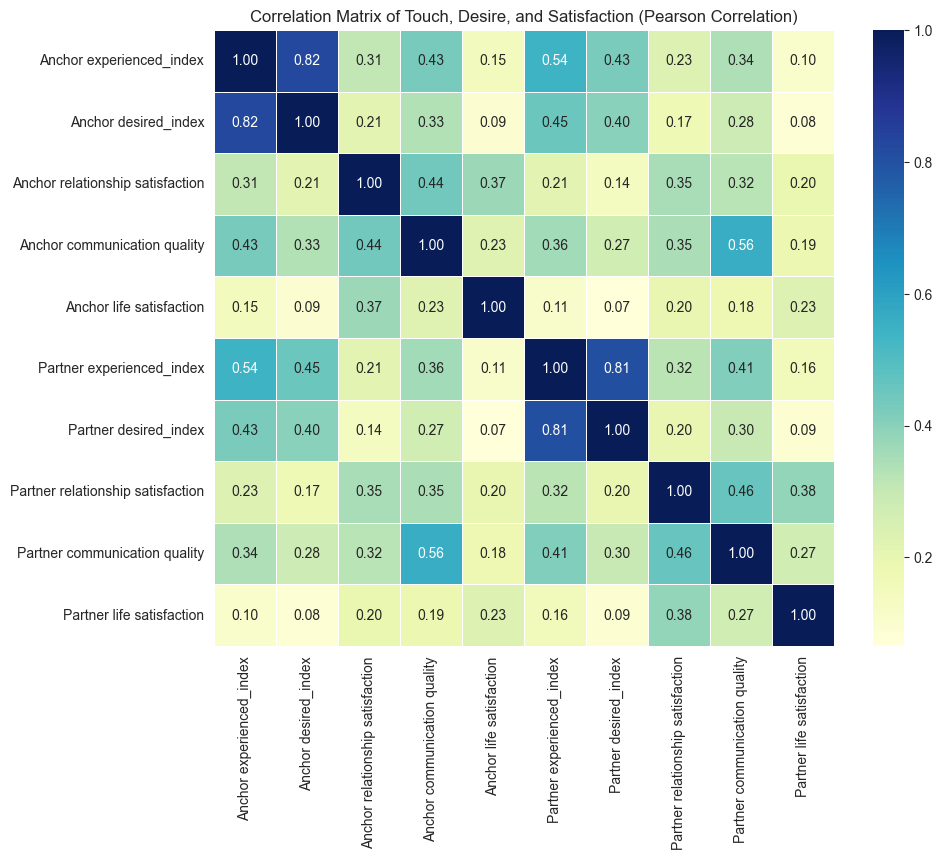

In [82]:
correlation_all = df[
    [
        'Anchor experienced_index', 'Anchor desired_index',
        'Anchor relationship satisfaction', 'Anchor communication quality', 'Anchor life satisfaction',
        'Partner experienced_index', 'Partner desired_index',
        'Partner relationship satisfaction', 'Partner communication quality', 'Partner life satisfaction'

    ]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.show()

Following "User's guide to correlation coefficients" (https://pmc.ncbi.nlm.nih.gov/articles/PMC6107969/)

1. There is a Strong correlation between touch experienced and touch desired for both Anchor (0.82) and Partner (0.81)
2. There is a Moderate correlation for communication quality between anchor and partner (0,56)
3. There is a Moderate correlation for experienced touch between anchor and partner (0.54)
4. There is a Moderate correlation between partner relationship satisfaction and communication quality (0,46)
5. There is a Moderate correlation between partner experienced touch and anchor desired touch (0,45)
6. There is a Moderate correlation between anchor experienced touch and partner desired touch (0,43)
7. There is a Moderate correlation between touch experienced and perceived communication quality within the relationship for the anchor (0.43)
8. There is a Moderate correlation between anchor desired touch and partner desired touch (0,40)

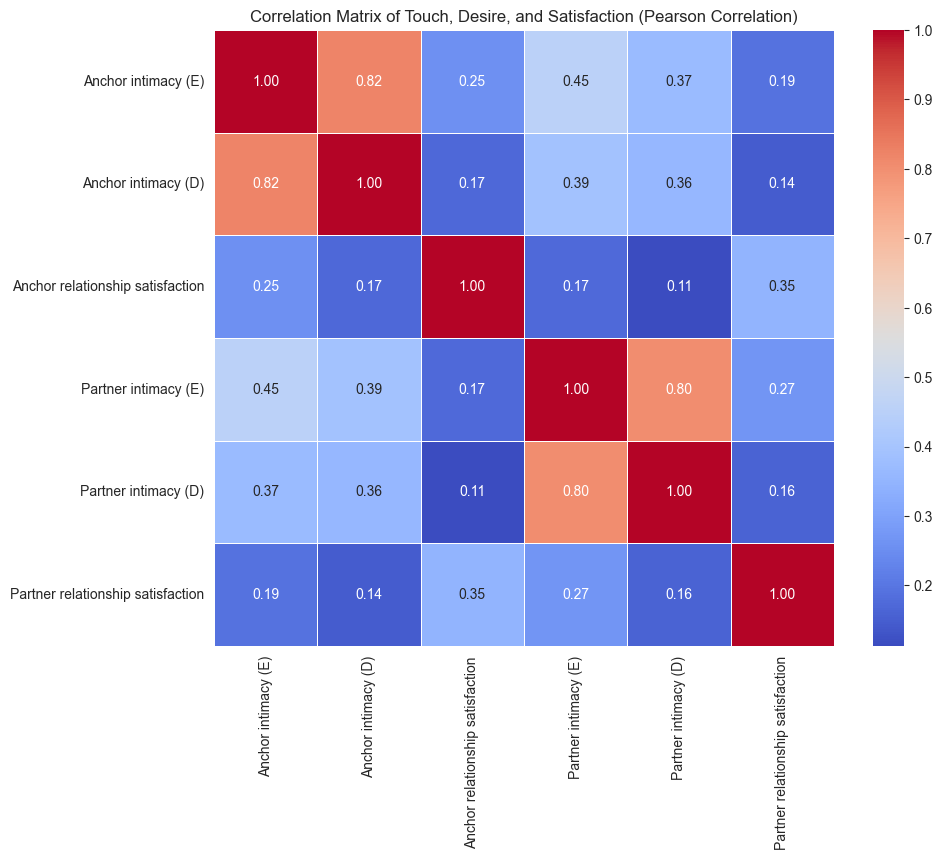

In [25]:
correlation_matrix = df[
    [
        'Anchor intimacy (E)', 'Anchor intimacy (D)',
        'Anchor relationship satisfaction',
        'Partner intimacy (E)', 'Partner intimacy (D)',
        'Partner relationship satisfaction',
    ]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.show()